# [E-05]KaggleCompetition ( 캐글 경진대회 )
_____

## 목차
### 1. 개요
    1.1 들어가기에 앞서
    1.2 루브릭 평가기준
### 2. 프로젝트 : This is your playground! Leaderboard를 정복해 주세요!
    2.1 데이터 준비
    2.2 데이터 전처리
    2.3 데이터 학습 및 하이퍼파라미터 조정
    2.4 블렌딩 및 테스트
### 3. 결론
    3.1 결론
    3.2 참조
    3.3 회고

-----

## 1. 개요
### 1.1 들어가기에 앞서

___

#### 학습 목표
- 데이터 사이언스 관련 최대 커뮤니티인 캐글의 경진대회에 직접 참여해서 문제를 해결해본다.
- 캐글에서 데이터를 내려받는 것으로부터 시작해서, 로컬 서버에서 자유롭게 다루어보며 문제 해결을 위한 고민을 해본다.
- 앙상블 기법의 개념과 강점을 이해하고, 여러 모델의 예측 결과를 Averaging 한 최종 결과로 캐글에 제출해본다.
- 하이퍼 파라미터 튜닝의 필요성과 의미를 이해하고, Grid Search, Random Search 등의 기법을 알아본다.
- Grid Search 기법을 활용해서 직접 하이퍼 파라미도터 튜닝 실험을 해보고, 모델의 성능을 최대한 끌어올려본다.
____

#### 이론 정리

##### 캐글(Kaggle)
- 데이터 사이언티스트들을 위한 경진대회 사이트

##### RMSE(Root Mean Squared Error)
- 실제 정답과 예측한 값의 차이의 제곱을 평균한 값의 제곱근를 의미

##### 블렌딩(blending)
- 앙상블 기법이라고도 불리며, 여러 가지 모델을 함께 사용할 수 있도록 결과를 섞어주는 기법

##### 앙상블 기법을 사용하는 이유?
- 하나의 강한 머신러닝 알고리즘보다 여러 개의 학습 알고리즘을 사용하면, 보다 정확한 최종 예측 도출을 도와주기 때문

##### Voting (앙상블 기법 중 하나)
- 여러 모델이 분류해 낸 결과들로부터 말 그대로 다수결 투표를 통해 최종 결과를 선택하는 방법으로, 분류 문제에서 사용

##### Averaging (앙상블 기법 중 하나)
- 각 모델이 계산해 낸 실숫값들을 평균 혹은 가중평균하여 사용하는 방법으로, 회귀 문제에서 사용

##### 파라미터
- 모델 파라미터는 모델이 학습을 하면서 점차 최적화되는, 그리고 최적화가 되어야 하는 파라미터

##### 하이퍼 파라미터
- 하이퍼 파라미터는 모델이 학습을 하기 위해서 사전에 사람이 직접 입력해 주는 파라미터

##### 그리드 탐색
- 사람이 먼저 탐색할 하이퍼 파라미터의 값들을 정해두고, 그 값들로 만들어질 수 있는 모든 조합을 탐색하는 방법. 특정 값에 대한 하이퍼 파라미터 조합을 모두 탐색하고자 할 때 유리

##### 랜덤 탐색
- 사람이 탐색할 하이퍼 파라미터의 공간만 정해두고, 그 안에서 랜덤으로 조합을 선택해서 탐색하는 방법


____

### 1.2 루브릭 평가기준
평가문항|상세기준
-|-
1. 캐글 데이터분석 전과정이 성공적으로 진행되었는가?| 데이터 전처리, 모델학습, 예측의 전체 과정을 거쳐 캐글 submission까지 진행되었다.
2. 전처리, 학습과정 및 결과에 대한 설명이 시각화를 포함하여 체계적으로 진행되었는가? | 제출된 노트북이 캐글 커널로 사용될 수 있을 만큼 전처리, 학습, 최적화 진행 과정이 체계적으로 기술되었다.
3. 회귀모델 예측정확도가 기준 이상 높게 나왔는가? | 다양한 피처 엔지니어링과 하이퍼 파라미터 튜닝 등의 최적화 기법을 통해 캐글 리더보드의 Private score 기준 110000 이하의 점수를 얻었다.

----

## 2. 프로젝트 : This is your playground! Leaderboard를 정복해 주세요!¶
### 2.1 데이터 준비

In [118]:
# 필요한 라이브러리 import

import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join

import pandas as pd
import numpy as np

import missingno as msno

from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [3]:
data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'

train_data_path = join(data_dir, 'train.csv')
test_data_path = join(data_dir, 'test.csv') 

train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)


In [4]:
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


---

### 2.2 데이터 전처리

In [5]:
train['date'] = train['date'].apply(lambda i: i[:6]).astype(int)
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,201410,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,201502,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,201502,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,201406,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,201501,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [6]:
y = train['price']
del train['price']

print(train.columns)

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [7]:
del train['id']

print(train.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [8]:
test['date'] = test['date'].apply(lambda i: i[:6]).astype(int)

del test['id']

print(test.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [9]:
y

0         221900.0
1         180000.0
2         510000.0
3         257500.0
4         291850.0
           ...    
15030     610685.0
15031    1007500.0
15032     360000.0
15033     400000.0
15034     325000.0
Name: price, Length: 15035, dtype: float64

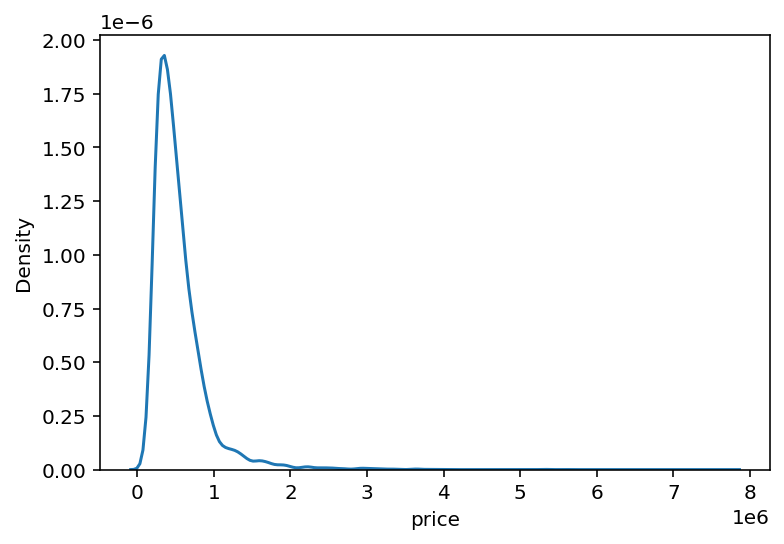

In [10]:
import seaborn as sns
sns.kdeplot(y)
plt.show()

In [11]:
y = np.log1p(y)
y

0        12.309987
1        12.100718
2        13.142168
3        12.458779
4        12.583999
           ...    
15030    13.322338
15031    13.822984
15032    12.793862
15033    12.899222
15034    12.691584
Name: price, Length: 15035, dtype: float64

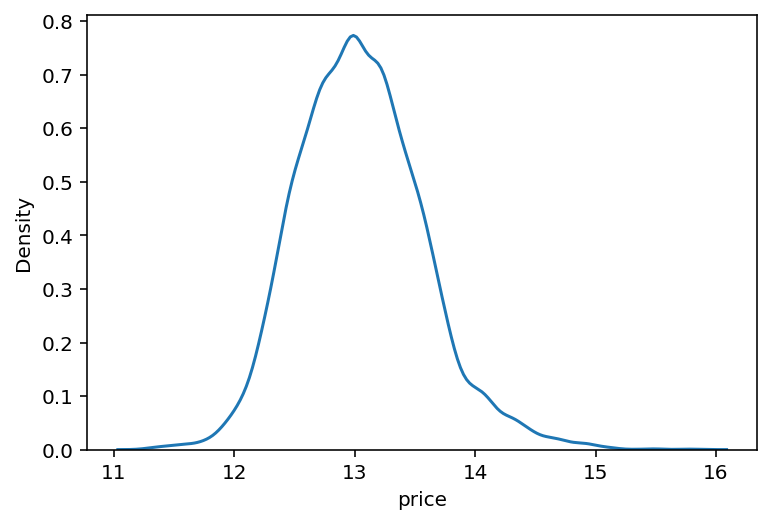

In [12]:
sns.kdeplot(y)
plt.show()

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           15035 non-null  int64  
 1   bedrooms       15035 non-null  int64  
 2   bathrooms      15035 non-null  float64
 3   sqft_living    15035 non-null  int64  
 4   sqft_lot       15035 non-null  int64  
 5   floors         15035 non-null  float64
 6   waterfront     15035 non-null  int64  
 7   view           15035 non-null  int64  
 8   condition      15035 non-null  int64  
 9   grade          15035 non-null  int64  
 10  sqft_above     15035 non-null  int64  
 11  sqft_basement  15035 non-null  int64  
 12  yr_built       15035 non-null  int64  
 13  yr_renovated   15035 non-null  int64  
 14  zipcode        15035 non-null  int64  
 15  lat            15035 non-null  float64
 16  long           15035 non-null  float64
 17  sqft_living15  15035 non-null  int64  
 18  sqft_l

---

### 2.3 데이터 학습 및 하이퍼파라미터 조정

In [23]:
def my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5):
    grid_model = GridSearchCV(model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=n_jobs)
    grid_model.fit(train, y)
    
    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']
    
    results = pd.DataFrame(params)
    results['score'] = score
    results['RMSLE'] = np.sqrt(-1 * results['score'])
    results = results.sort_values('RMSLE')
    
    return results

In [25]:
random_state = 42
param_grid = {
    'objective':['regression'],
    'learning_rate' : [0.05],
    'n_estimators':[100,500,1000],
    'max_depth': [1, 10, 20, 30, 40, 50],
}

model = LGBMRegressor(random_state=random_state)
my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=1)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


,learning_rate,max_depth,n_estimators,objective,score,RMSLE
4,0.05,10,500,regression,-0.025927,0.161020
5,0.05,10,1000,regression,-0.025930,0.161028
8,0.05,20,1000,regression,-0.026044,0.161381
14,0.05,40,1000,regression,-0.026047,0.161392
11,0.05,30,1000,regression,-0.026047,0.161392
17,0.05,50,1000,regression,-0.026047,0.161392
16,0.05,50,500,regression,-0.026054,0.161413
10,0.05,30,500,regression,-0.026054,0.161413
13,0.05,40,500,regression,-0.026054,0.161413
7,0.05,20,500,regression,-0.026067,0.161453


In [24]:
param_grid = {
    'learning_rate': [0.05],
    'subsample': [0.9],
    'n_estimators':[100,500,1000],
    'max_depth': [1, 5, 10, 20, 30, 40, 50],
}

model = XGBRegressor(random_state=random_state)
my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=1)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


,learning_rate,max_depth,n_estimators,subsample,score,RMSLE
5,0.05,5,1000,0.9,-0.025476,0.159613
7,0.05,10,500,0.9,-0.025893,0.160913
8,0.05,10,1000,0.9,-0.025997,0.161236
4,0.05,5,500,0.9,-0.026010,0.161277
17,0.05,40,1000,0.9,-0.027226,0.165003
16,0.05,40,500,0.9,-0.027226,0.165003
20,0.05,50,1000,0.9,-0.027264,0.165119
19,0.05,50,500,0.9,-0.027264,0.165119
11,0.05,20,1000,0.9,-0.027273,0.165146
10,0.05,20,500,0.9,-0.027273,0.165147


In [26]:
LGB_model = LGBMRegressor(max_depth=-1, n_estimators=50, learning_rate=0.1,  colsample_bytree =0.7, num_iterations=1000, random_state=random_state)

In [27]:
LGB_model.fit(train, y)
LGB_prediction = LGB_model.predict(test)
LGB_prediction = np.expm1(LGB_prediction)

In [28]:
LGB_prediction

array([ 529934.6983963 ,  500807.44922907, 1265769.14992824, ...,
        458495.93795937,  318454.91632151,  440983.49531379])

In [29]:
data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'

submission_path = join(data_dir, 'sample_submission.csv')
submission = pd.read_csv(submission_path)
submission.head()

,id,price
0,15035,100000
1,15036,100000
2,15037,100000
3,15038,100000
4,15039,100000


In [30]:
submission['price'] = LGB_prediction
submission.head()

,id,price
0,15035,5.299347e+05
1,15036,5.008074e+05
2,15037,1.265769e+06
3,15038,3.160197e+05
4,15039,3.193510e+05


In [31]:
submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(data_dir, 'lgbm', '0.161')
submission.to_csv(submission_csv_path, index=False)
print(submission_csv_path)

/aiffel/aiffel/kaggle_kakr_housing/data/submission_lgbm_RMSLE_0.161.csv


In [105]:
XGB_model = XGBRegressor(max_depth=50, n_estimators=150, learning_rate=0.1, colsample_bytree=0.6, random_state=random_state)

In [106]:
XGB_model.fit(train, y)
XGB_prediction = XGB_model.predict(test)
XGB_prediction = np.expm1(XGB_prediction)

In [107]:
data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'

submission_path = join(data_dir, 'sample_submission.csv')
submission = pd.read_csv(submission_path)
submission.head()

,id,price
0,15035,100000
1,15036,100000
2,15037,100000
3,15038,100000
4,15039,100000


In [108]:
submission['price'] = XGB_prediction
submission.head()

,id,price
0,15035,5.440460e+05
1,15036,4.370155e+05
2,15037,1.234558e+06
3,15038,3.216772e+05
4,15039,3.386519e+05


In [109]:
submission_csv_path = '{}/submission_{}.csv'.format(data_dir, 'LGB_XGB_GBR_RFR')
submission.to_csv(submission_csv_path, index=False)
print(submission_csv_path)

/aiffel/aiffel/kaggle_kakr_housing/data/submission_LGB_XGB_GBR_RFR.csv


In [169]:
xgboost = XGBRegressor(max_depth=50, n_estimators=150, learning_rate=0.1, colsample_bytree=0.6, random_state=random_state)
lightgbm =  LGBMRegressor(max_depth=-1, n_estimators=50, learning_rate=0.1,  colsample_bytree =0.7, num_iterations=1000, random_state=random_state)

---

### 2.4 블렌딩 및 테스트

In [161]:
def get_cv_score(models):
    kfold = KFold(n_splits=5).get_n_splits(train.values)
    for m in models:
        CV_score = np.mean(cross_val_score(m['model'], X=train.values, y=y, cv=kfold))
        print(f"Model: {m['name']}, CV score:{CV_score:.4f}")

In [170]:
xgboost.fit(train.values, y)
lightgbm.fit(train.values, y)


x = xgboost.predict(test.values)
l = lightgbm.predict(test.values)
s =  x * 0.3 + l*0.7
print(s)
print(len(s))

[13.18839118 13.08309918 14.04369725 ... 13.04454879 12.67818424
 13.00632271]
6468


In [171]:
y_pred = np.expm1(s)
y_pred

array([ 534127.20760811,  480747.32763114, 1256318.84491455, ...,
        462566.97088366,  320674.26081403,  445218.50731146])

In [172]:
data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'

submission_path = join(data_dir, 'sample_submission.csv')
submission = pd.read_csv(submission_path)
submission.head()

,id,price
0,15035,100000
1,15036,100000
2,15037,100000
3,15038,100000
4,15039,100000


In [173]:
submission['price'] = y_pred
submission.head()

,id,price
0,15035,5.341272e+05
1,15036,4.807473e+05
2,15037,1.256319e+06
3,15038,3.177052e+05
4,15039,3.250216e+05


In [174]:
submission_csv_path = '{}/submission_{}.csv'.format(data_dir, 'LGB_XGB_GBR_RFR')
submission.to_csv(submission_csv_path, index=False)
print(submission_csv_path)

/aiffel/aiffel/kaggle_kakr_housing/data/submission_LGB_XGB_GBR_RFR.csv


---
## 3.결론
### 3.1 결론

**Private Score = 109872**

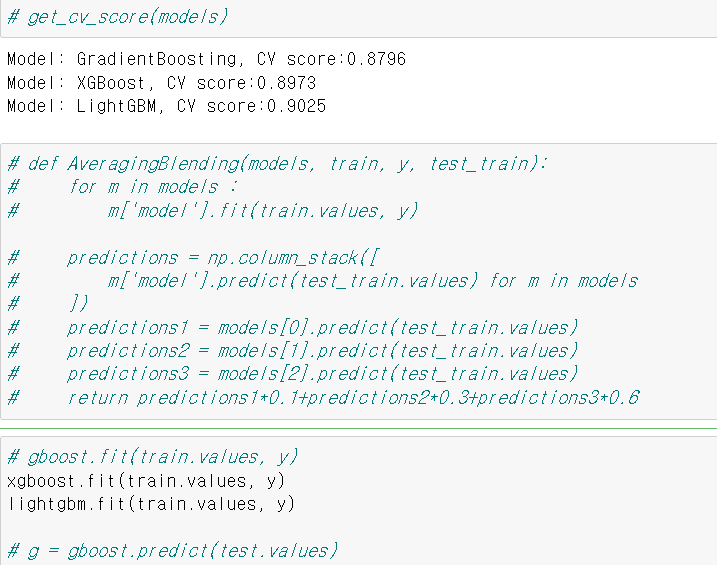


---

### 3.2 참조
- 하이퍼 파라미터 튜닝: https://daje0601.tistory.com/197

- XGBoost,LightGBM: https://assaeunji.github.io/machine%20learning/2021-01-07-xgboost/

- 앙상블 기법: https://velog.io/@fiifa92/%EC%95%99%EC%83%81%EB%B8%94Ensemble-%EA%B8%B0%EB%B2%95



---

### 3.3 회고

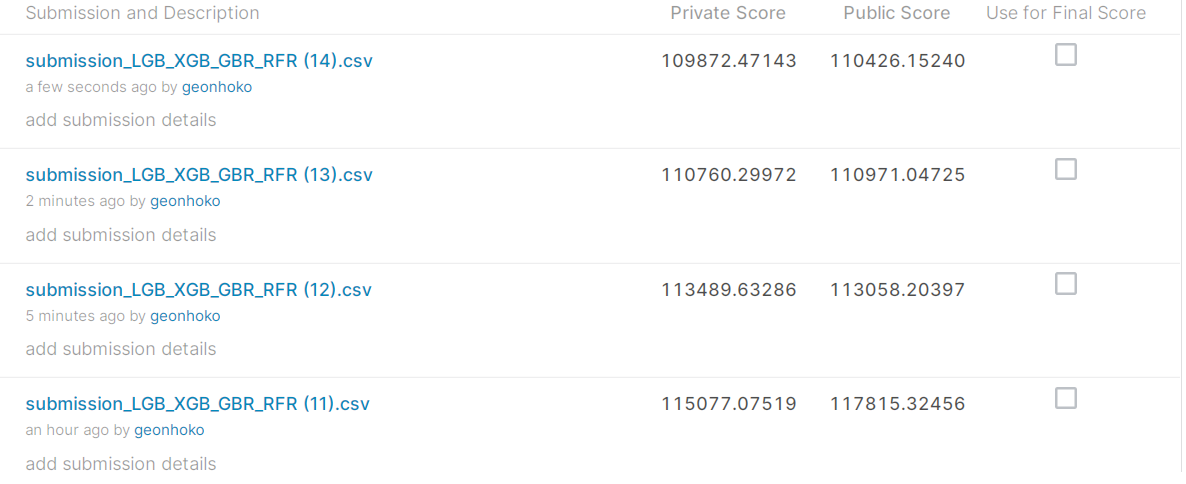

- 일단 전체 과정을 걸쳐 루브릭 기준에 만족하는 Private score를 달성했다. 사실 스스로했으면 종일 하이퍼 파라미터 튜닝만 만졌을 텐데, 조원 진환님이 하이퍼 파라미터 조정과 앙상블 기법을 활용할 수 있도록 큰 도움을 주셨다. 원래는 위 사진처럼 GradientBoostingRegressor 모델을 포함하여 테스트까지 돌렸지만 원하는 Private Score가 나오지 않아, 주석처리 부분을 지워주었다.

- 처음 캐글을 접했기에 이번 노드는 어려움이 컸던 것 같다. 또한 원하는 점수를 얻기 위해 다양한 하이퍼 파라미터를 튜닝하기까지 많은 시도가 필요했고, 시도해볼 수 있는 방법은 다양하겠지만 최적의 조합을 찾기에는 정보가 많이 부족했던 것 같다. 만족스러운 결과를 도출해냈어도, 과정에서는 불만족스러웠던 프로젝트가 되었던 것 같다.
